In [1]:
# 002 - https://www.tensorflow.org/tutorials/keras/classification

# Basic classification: Classify images of clothing

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.3.1


In [4]:
# load minst fashion database

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



In [6]:
# explore dataset

train_images.shape


(60000, 28, 28)

In [7]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape


(10000, 28, 28)

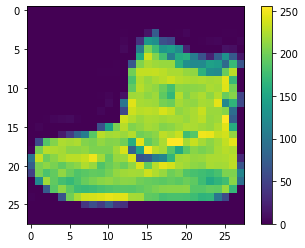

In [9]:
# looking at the data

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# one needs to pre-process the training set and the test set to 0s and 1s 
train_images = train_images / 255.0

test_images = test_images / 255.0

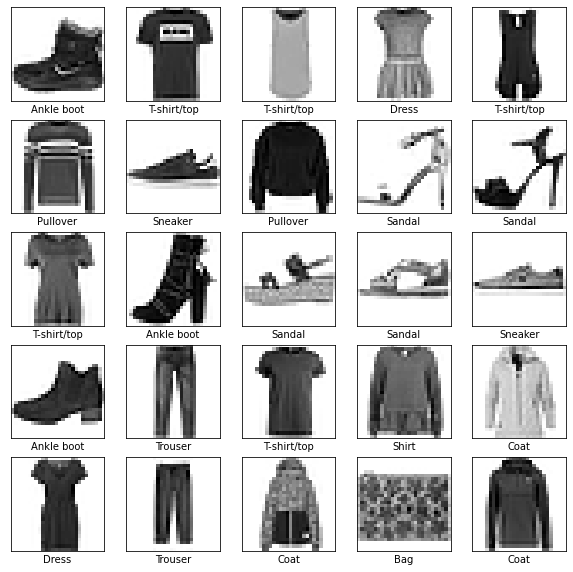

In [11]:
# Verify the data is correct

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [21]:
# build the model 

# setup layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images 
from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array 
(of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the
image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.




Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model

Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
The model learns to associate images and labels.
You ask the model to make predictions about a test set—in this example, the test_images array.
Verify that the predictions match the labels from the test_labels array.

Feed the model

To start training, call the model.fit method—so called because it "fits" the model to the training data

In [23]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4890 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3637 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3261 - accuracy: 0.8792
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3033 - accuracy: 0.8879
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2868 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2718 - accuracy: 0.8987
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2584 - accuracy: 0.9032
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2408 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.230

In [24]:
# Evaluate accuracy
# Next, compare how the model performs on the test dataset:

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.3249 - accuracy: 0.8839

Test accuracy: 0.883899986743927


1. Accuracy at  setup 
```py
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(10)
])```

313/313 - 1s - loss: 0.3320 - accuracy: 0.8857

Test accuracy: 0.885699987411499

2. Accuracy at  setup 

```py
# setup layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(10)
])
```

test accuracy at 128 nodes was - 
313/313 - 1s - loss: 0.3251 - accuracy: 0.8870
Test accuracy: 0.8870000243186951

It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

Demonstrate overfitting
Strategies to prevent overfitting


Make predictions

With the model trained, you can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [25]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)


predictions[0]


array([8.54245172e-06, 1.29094798e-04, 2.04118564e-07, 2.23986561e-07,
       6.05279013e-07, 2.89982534e-04, 4.55503084e-08, 1.55411465e-02,
       6.78477576e-08, 9.84030008e-01], dtype=float32)

In [26]:
# A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. 
# You can see which label has the highest confidence value:

np.argmax(predictions[0])


9

In [27]:
# So, the model is most confident that this image is an ankle boot, or class_names[9]. 
class_names[9]
# Examining the test label shows that this classification is correct:



'Ankle boot'

In [29]:
# Graph this to look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


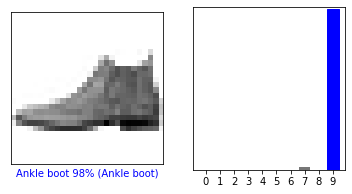

In [33]:
# Verify predictions

# With the model trained, you can use it to make predictions about some images.

# Let's look at the 0th image, predictions, 
# and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. 
# The number gives the percentage (out of 100) for the predicted label

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

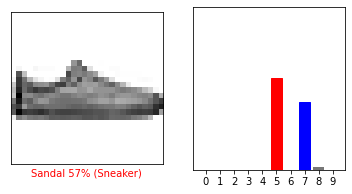

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [35]:
class_names[5], class_names[7], class_names[8]

('Sandal', 'Sneaker', 'Bag')

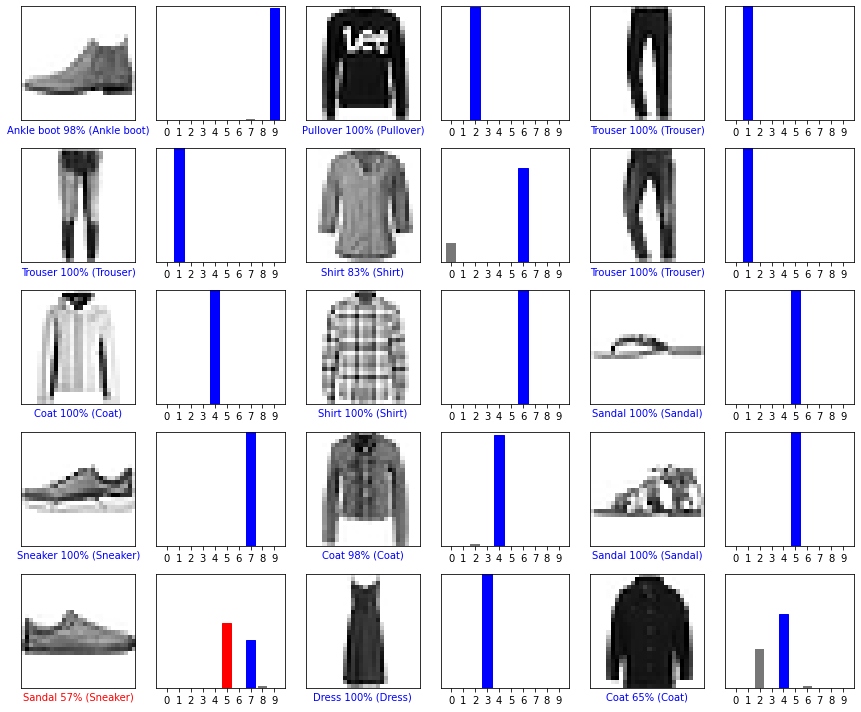

In [36]:
# Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [37]:
# Use the trained model

# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [39]:
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
# Accordingly, even though you're using a single image, you need to add it to a list:

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [40]:
# Now predict the correct label for this image:

predictions_single = probability_model.predict(img)

print(predictions_single)


[[4.2932712e-05 1.1172116e-12 9.9909651e-01 3.1313320e-08 6.4641837e-04
  4.5770142e-13 2.1414277e-04 4.5533260e-15 9.9808295e-09 6.1292707e-12]]


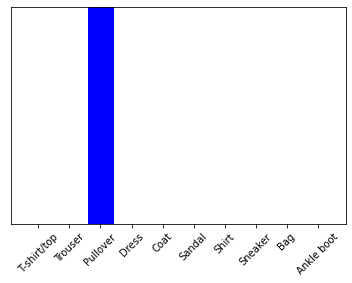

In [41]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [42]:
# it's the second image = pullover 100%.

In [ ]:
# Where are you now - https://www.tensorflow.org/tutorials/keras/text_classification